# 머신러닝을 통한 다중 선형 회귀

### Step 1. 데이터 생성

In [1]:
import pandas as pd
data = pd.read_csv("waterquality.csv", encoding = "CP949")

new_data = data[(data['yy']>2000) &
                (data['t.coli'] > 0) &
                (data['do'] > 0) &
                (data['f.coli'] > 0)]

In [3]:
new_data.head()
print(len(new_data))

5602


In [5]:
## 로그를 이용한 데이터 전처리 ## 
import numpy as np
t_coli = np.log(new_data['t.coli'])
do = np.log(new_data['do'])
f_coli = np.log(new_data['f.coli'])

In [6]:
x = np.array([do, f_coli])
x = x.T
y = np.array(t_coli)

In [8]:
print(x)
print(y[0:5])

[[ 2.20827441  5.39362755]
 [ 2.57261223 11.40756495]
 [ 2.39789527 11.8493977 ]
 ...
 [ 2.44234704  8.49699048]
 [ 2.2300144   6.13122649]
 [ 2.2300144   7.09007684]]
[ 6.39692966 13.12236338 14.15198279  5.768321   12.61153775]


In [9]:
## StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = np.ravel(scaler.fit_transform(y.reshape(len(y), 1)))

In [10]:
print(x)
print(y[0:5])

[[-0.17885016 -0.44713504]
 [ 0.91806635  1.97049064]
 [ 0.39204378  2.14810909]
 ...
 [ 0.52587527  0.80042865]
 [-0.1133973  -0.15061746]
 [-0.1133973   0.23484402]]
[-1.16241369  1.77877252  2.22904868 -1.43731866  1.55537678]


### Step 2. Training, Test 8:2 or 7:3

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [13]:
print(len(x_train), len(x_test))

4481 1121


### Step3. Optimization with Stochastic Gradient Descent

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, learning_rate = "constant",
                       eta0 = 0.0001, verbose = 1, penalty = None,
                       n_iter_no_change = 100, warm_start = True)

In [16]:
'''
-------------SGDRegressor------------
max_iter : 최대로 훈련을 시키는 횟수
learning_rate : 학습률
eta0: 학습률을 결정하는 요소
verbose : 반복학습이 진행될때 필요한 정보를 보여주게 됨
penalty : l1규제 l2규제, Lasso, Ridge를 할 순 있긴 한데 다른 Regressor 존재함
          기본적으로 None을 꼭 해주어야 규제가 들어가지 않은 학습을 진행할수 있다.
n_iter_no_change : 목적함수의 값이 원하는 갯수 만큼 변하지 않는다면 그 모델을 성립된 모델로 간주함
warm_start : 훈련시킨 회귀분석을 지속해서 훈련을 시키고 싶을 때 사용함.
--------------------------------------
'''
## learning_rate = 'optimal' ##

'\n-------------SGDRegressor------------\nmax_iter : 최대로 훈련을 시키는 횟수\nlearning_rate : 학습률\neta0: 학습률을 결정하는 요소\nverbose : 반복학습이 진행될때 필요한 정보를 보여주게 됨\npenalty : l1규제 l2규제, Lasso, Ridge를 할 순 있긴 한데 다른 Regressor 존재함\n          기본적으로 None을 꼭 해주어야 규제가 들어가지 않은 학습을 진행할수 있다.\nn_iter_no_change : 목적함수의 값이 원하는 갯수 만큼 변하지 않는다면 그 모델을 성립된 모델로 간주함\nwarm_start : 훈련시킨 회귀분석을 지속해서 훈련을 시키고 싶을 때 사용함.\n--------------------------------------\n'

In [17]:
### loss 함수의 history 추출 ### 
import sys
from io import StringIO
string_list = sys.stdout
sys.stdout = mystdout = StringIO()

### fitting ###
sgd_reg.fit(x_train, y_train)

sys.stdout = string_list
loss_history = mystdout.getvalue()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [18]:
loss_list = []
sequence = []
for seq, line in enumerate(loss_history.split("\n")):
    # loss를 한 5씩 끊어서 보고 싶음
    if (seq + 1) % 5 == 0:
        
        if(len(line.split("loss: ")) == 1):
            continue
        
        sequence.append(((seq+1) +2)/3+1)
        loss_list.append(float(line.split("loss: ")[-1]))

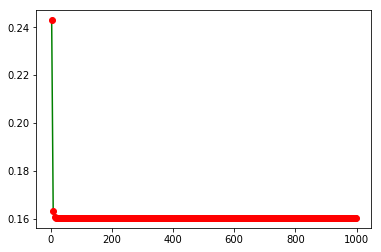

In [20]:
### plotting ###
import matplotlib.pyplot as plt
plt.plot(sequence, loss_list, 'g-')
plt.plot(sequence, loss_list, 'ro')
plt.show()

In [21]:
# 상수항 #
print(sgd_reg.coef_)
# 회귀 계수 #
print(sgd_reg.intercept_)

[-0.01491138  0.81349181]
[0.00144601]


In [22]:
X_1 = np.linspace(min(x.T[0]), max(x.T[0]))
X_2 = np.linspace(min(x.T[1]), max(x.T[1]))
X_1, X_2 = np.meshgrid(X_1, X_2)
Y = sgd_reg.coef_[0] * X_1 + sgd_reg.coef_[1] * X_2 + sgd_reg.intercept_

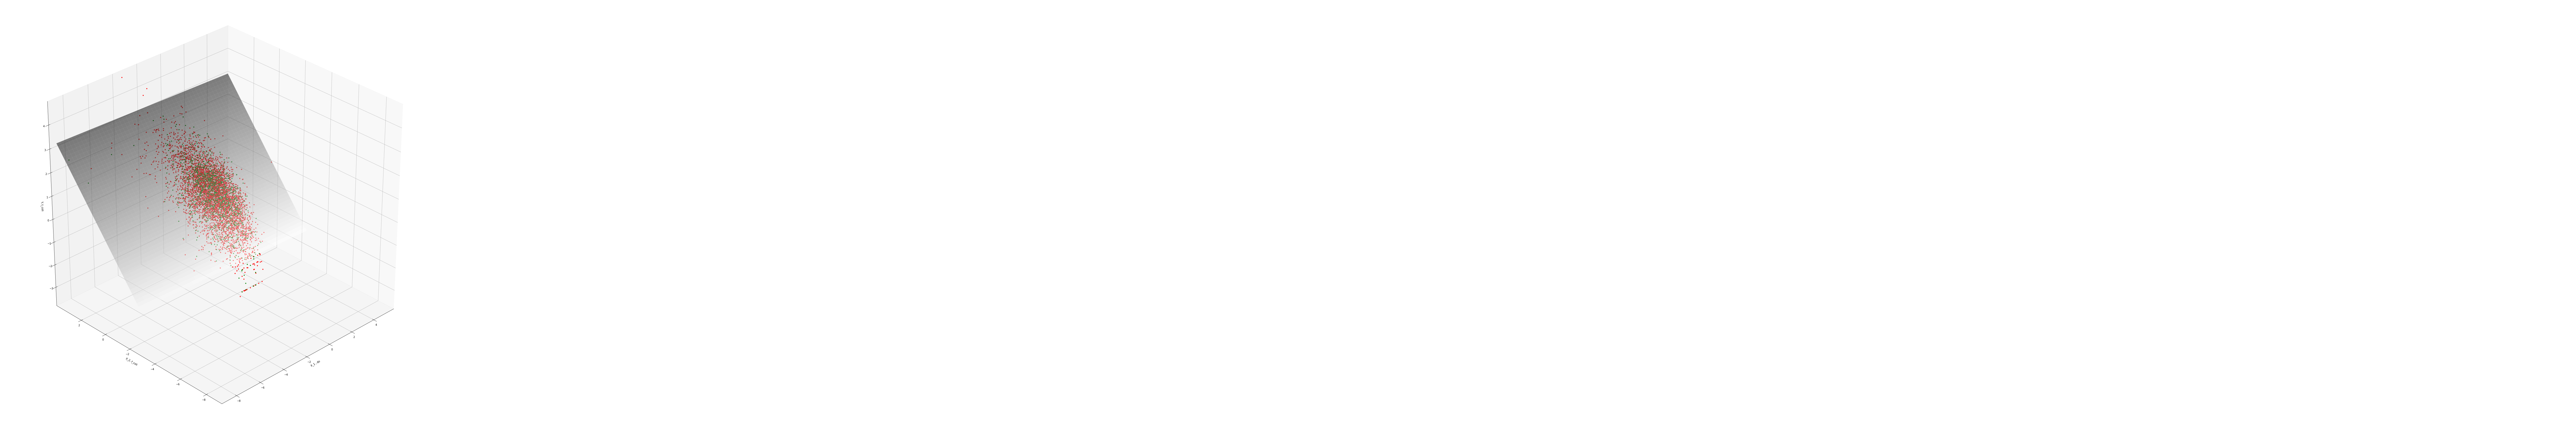

In [28]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
ax = plt.axes(projection = '3d')

ax.plot_surface(X_1, X_2, Y, alpha = 0.5, cmap = 'binary')
ax.plot(x_train.T[0], x_train.T[1], y_train, 'r.')
ax.plot(x_test.T[0], x_test.T[1], y_test, 'g.')

ax.view_init(elev = 31, azim = -134)
ax.set_ylim(min(x.T[0]), max(x.T[1]))
ax.set_xlim(min(x.T[0]), max(x.T[0]))
ax.set_zlim(min(y), max(y))
ax.set_xlabel("X_1 , do")
ax.set_ylabel("X_2, f_coli")
ax.set_zlabel("Y, t_coli")
plt.show()

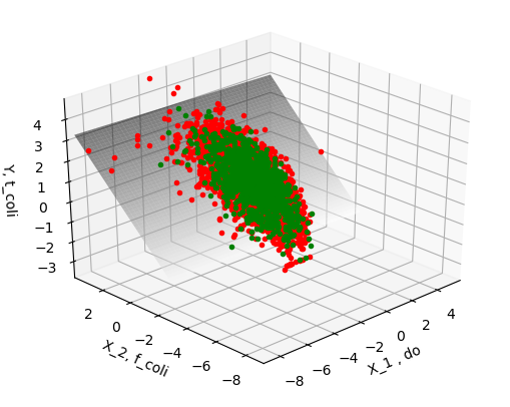

### Step4 성능평가

In [29]:
### 성능 평가 ###
def RMSE(regression_y, real_y):
    n=len(real_y)
    sum_val = 0
    for i in range(n):
        diff_square = (real_y[i][0] - regression_y[i][0])**2
        sum_val += diff_square
    rmse = (sum_val/n)**0.5
    return rmse


In [30]:
regression_y = sgd_reg.coef_[0] * x_test[:, 0] + sgd_reg.coef_[1] * x_test[:, 1] + sgd_reg.intercept_
regression_y = regression_y.reshape(len(regression_y), 1)
real_y = y_test.reshape(len(y_test), 1)

In [33]:
RMSE_val = RMSE(regression_y, real_y)
print(RMSE_val)

0.5774154811226853


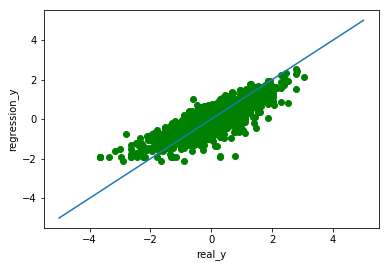

In [34]:
plt.plot(real_y, regression_y, 'go')
X = np.linspace(-5, 5, 5)
plt.plot(X, X)
plt.xlabel("real_y")
plt.ylabel("regression_y")
plt.show()
